EJERCICIO 1:

Buscar un conjunto de datos a analizar:
* Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.


EJERCICIO 2

Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
* Esto se hace para que comprendais mejor los datos con los que estais trabajando.
* Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

 `Hemos escogido un dataset de características y precios de coches.`

In [4]:
df = pd.read_csv("datos/cars_price.csv")
df.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8


Hacemos una pequeña descripción de las variables de nuestro dataset:

- ID: número de identificación.
- PRICE: precio.
- LEVY: impuestos.
- MANUFACTURER: fabricante.
- MODEL: modelo.
- PROD. YEAR: año de producción del coche.
- CATEGORY: marca..
- LEATHER INTERIOR: si el coche tiene cuero en su interior.
- FUEL TYPE: tipo de combustible.
- ENGINE VOLUME: volúmen del motor.
- MILEAGE: kilometraje recorrido.
- CYLINDERS: número de cilindros.
- GEAR BOX TIPE: tipo de caja de cambios.
- DRIVE WHEELS: tipo de tracción de las ruedas.
- DOORS: número de puertas.
- WHEEL: ruedas.
- COLOR: color del coche.
- AIRBAGS: número de bolsas de aire que tiene.

- Vemos la información general del dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

- Hacemos limpieza de la colummna `Doors` para que se quede solo con el número de puertas y transformarla a tipo categórico. 

In [6]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [7]:
df['Doors'] = df['Doors'].str.split('-').str[0]

In [8]:
df['Doors'] = df['Doors'].str.replace('>', ' ')

In [9]:
df = df.astype({'Doors':'category'})

Observamos que tenemos las columnas 'Mileage' y 'Levy' para convertirlas a tipo int. Primero haremos la limpieza de cada columna para luego hacer la conversión.

In [10]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [11]:
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

- Limpiamos la columna 'Mileage' para que solo se quede con el nro de kilometraje.

In [12]:
df['Mileage'] = df['Mileage'].str.split(' ').str[0]

In [13]:
df['Levy'] = df['Levy'].str.replace('-', '0')

- Hacemos las comprobaciones correspondientes para comprobar los valores únicos de las columnas que hemos limpiado. 

In [14]:
df['Doors'].unique()

['04', '02', ' 5']
Categories (3, object): [' 5', '02', '04']

In [15]:
df['Mileage'].unique()

array(['186005', '192000', '200000', ..., '140607', '307325', '186923'],
      dtype=object)

In [16]:
df['Levy'].unique()

array(['1399', '1018', '0', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

- Convertimos las columnas 'Mileage' y 'levy' a tipo int.

In [17]:
df = df.astype({'Mileage':'int64', 'Levy':'int64'})

- Verificamos que se haya hecho el cambio de tipo de datos correctamente para las columnas 'Doors', 'Milage' y 'Levy'. 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                19237 non-null  int64   
 1   Price             19237 non-null  int64   
 2   Levy              19237 non-null  int64   
 3   Manufacturer      19237 non-null  object  
 4   Model             19237 non-null  object  
 5   Prod. year        19237 non-null  int64   
 6   Category          19237 non-null  object  
 7   Leather interior  19237 non-null  object  
 8   Fuel type         19237 non-null  object  
 9   Engine volume     19237 non-null  object  
 10  Mileage           19237 non-null  int64   
 11  Cylinders         19237 non-null  float64 
 12  Gear box type     19237 non-null  object  
 13  Drive wheels      19237 non-null  object  
 14  Doors             19237 non-null  category
 15  Wheel             19237 non-null  object  
 16  Color             1923

- Vamos a eliminar la columna 'Wheel' porque creemos que no aporta información necesaria para las características del coche.

In [19]:
df.drop(['Wheel'], axis = 1, inplace = True)

- Vemos el número de filas y columnas del dataframe

In [20]:
df.shape #Tiene 19237 filas y 17 columnas.

(19237, 17)

- Vemos el nombre de las columnas de nuestro dataframe

In [21]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Color',
       'Airbags'],
      dtype='object')

- Vemos los principales estadísticos de las columnas numéricas.

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,9.365914e+05,20746880.0,45698374.0,45772308.0,45802036.0,4.581665e+07
Price,19237.0,1.855593e+04,1.905813e+05,1.0,5331.0,13172.0,22075.0,2.630750e+07
Levy,19237.0,6.325287e+02,5.677217e+02,0.0,0.0,642.0,917.0,1.171400e+04
Prod. year,19237.0,2.010913e+03,5.668673e+00,1939.0,2009.0,2012.0,2015.0,2.020000e+03
Mileage,19237.0,1.532236e+06,4.840387e+07,0.0,70139.0,126000.0,188888.0,2.147484e+09
Cylinders,19237.0,4.582991e+00,1.199933e+00,1.0,4.0,4.0,4.0,1.600000e+01
Airbags,19237.0,6.582627e+00,4.320168e+00,0.0,4.0,6.0,12.0,1.600000e+01


- Vemos los principales estadisticos de las variables categóricas

In [23]:
df.describe(include ="object").T

,count,unique,top,freq
Manufacturer,19237,65,HYUNDAI,3769
Model,19237,1590,Prius,1083
Category,19237,11,Sedan,8736
Leather interior,19237,2,Yes,13954
Fuel type,19237,7,Petrol,10150
Engine volume,19237,107,2,3916
Gear box type,19237,4,Automatic,13514
Drive wheels,19237,3,Front,12874
Color,19237,16,Black,5033


- Vemos los valores nulos en el dataframe

In [24]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Color               0
Airbags             0
dtype: int64

- Vemos los duplicados

In [25]:
df.duplicated().sum()

313

- Eliminamos los duplicados

In [26]:
df = df.drop_duplicates()

In [27]:
df.duplicated().sum()

0

- Chequeamos los outliers visualmente.

In [28]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
0,45654403,13328,1399,2010,186005,6.0,12
1,44731507,16621,1018,2011,192000,6.0,8


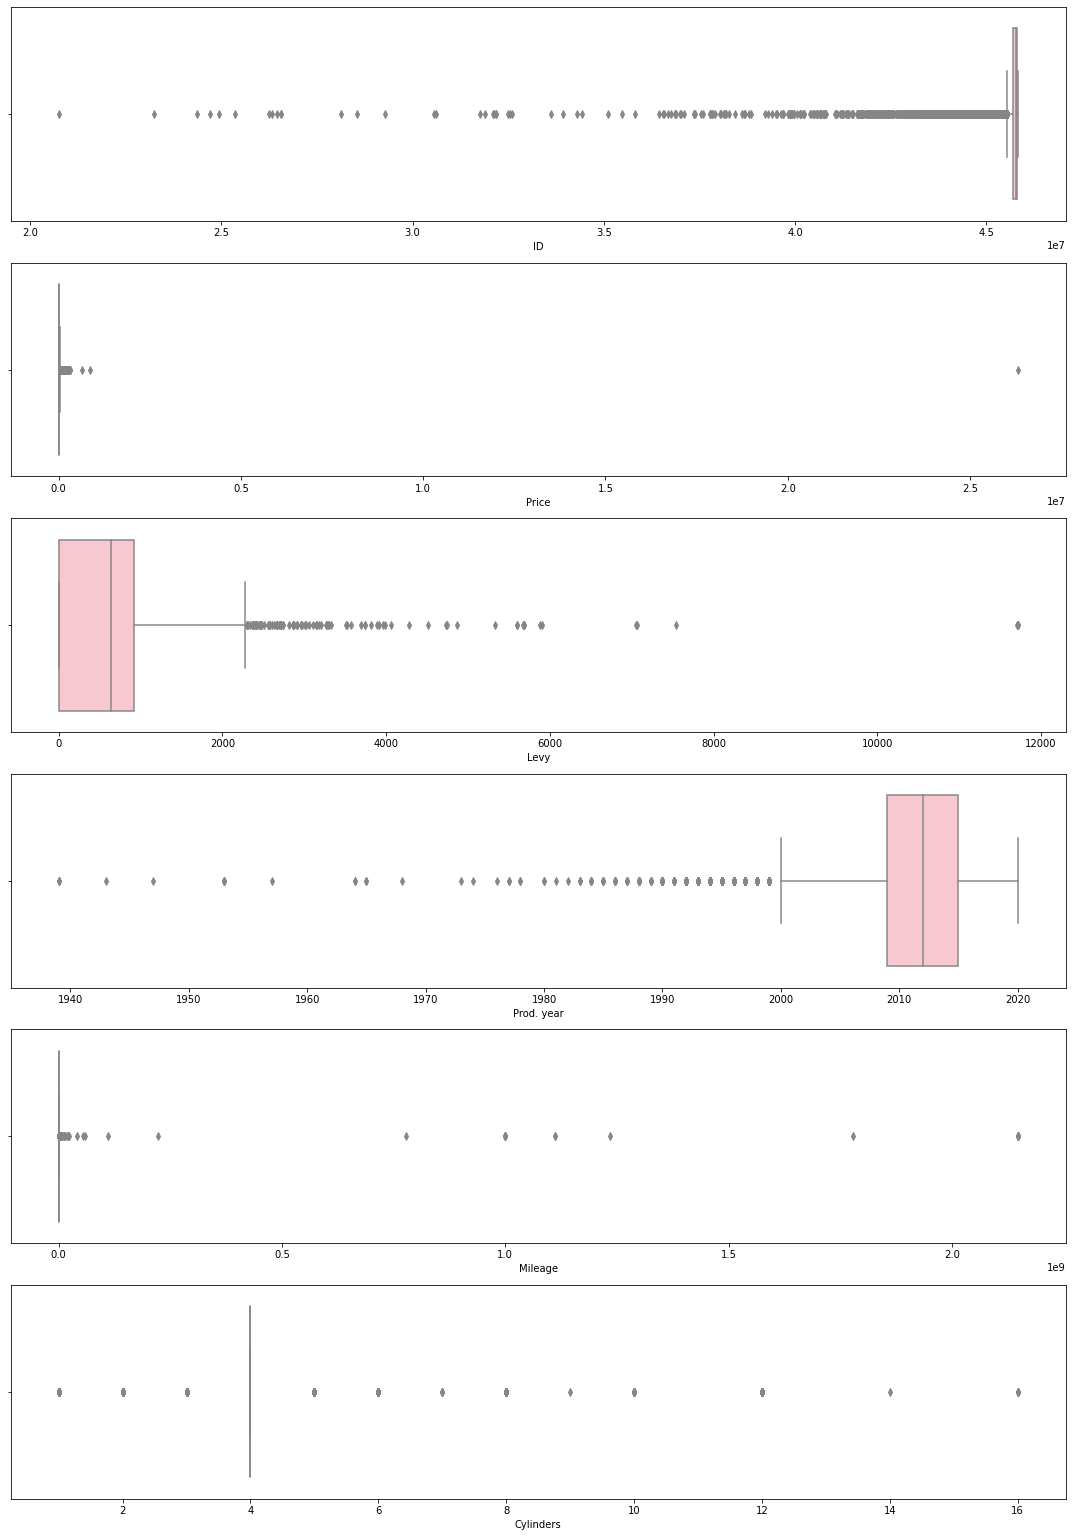

In [29]:
fig, axes = plt.subplots(7, 1, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "pink"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

Observando los outliers creemos necesario hacer un filtrado general por la `Prod. year` que sea mayor al año 2000. Ya que los precios para los años anteriores no los consideramos representativos para poder predecir el precio de los coches.

In [30]:
df_limpio = df[df['Prod. year'] > 2000]
df_limpio

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,04,Grey,12
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,04,Black,4


También hemos observado que al hacer el filtrado por el año hemos eliminado el registro que representaba un outlier en el precio, es decir, era un valor mucho más elevado que el resto.

Revisamos los outliers nuevamente después de nuestra primera limpieza. 

In [31]:
numericas = df_limpio.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
0,45654403,13328,1399,2010,186005,6.0,12
1,44731507,16621,1018,2011,192000,6.0,8


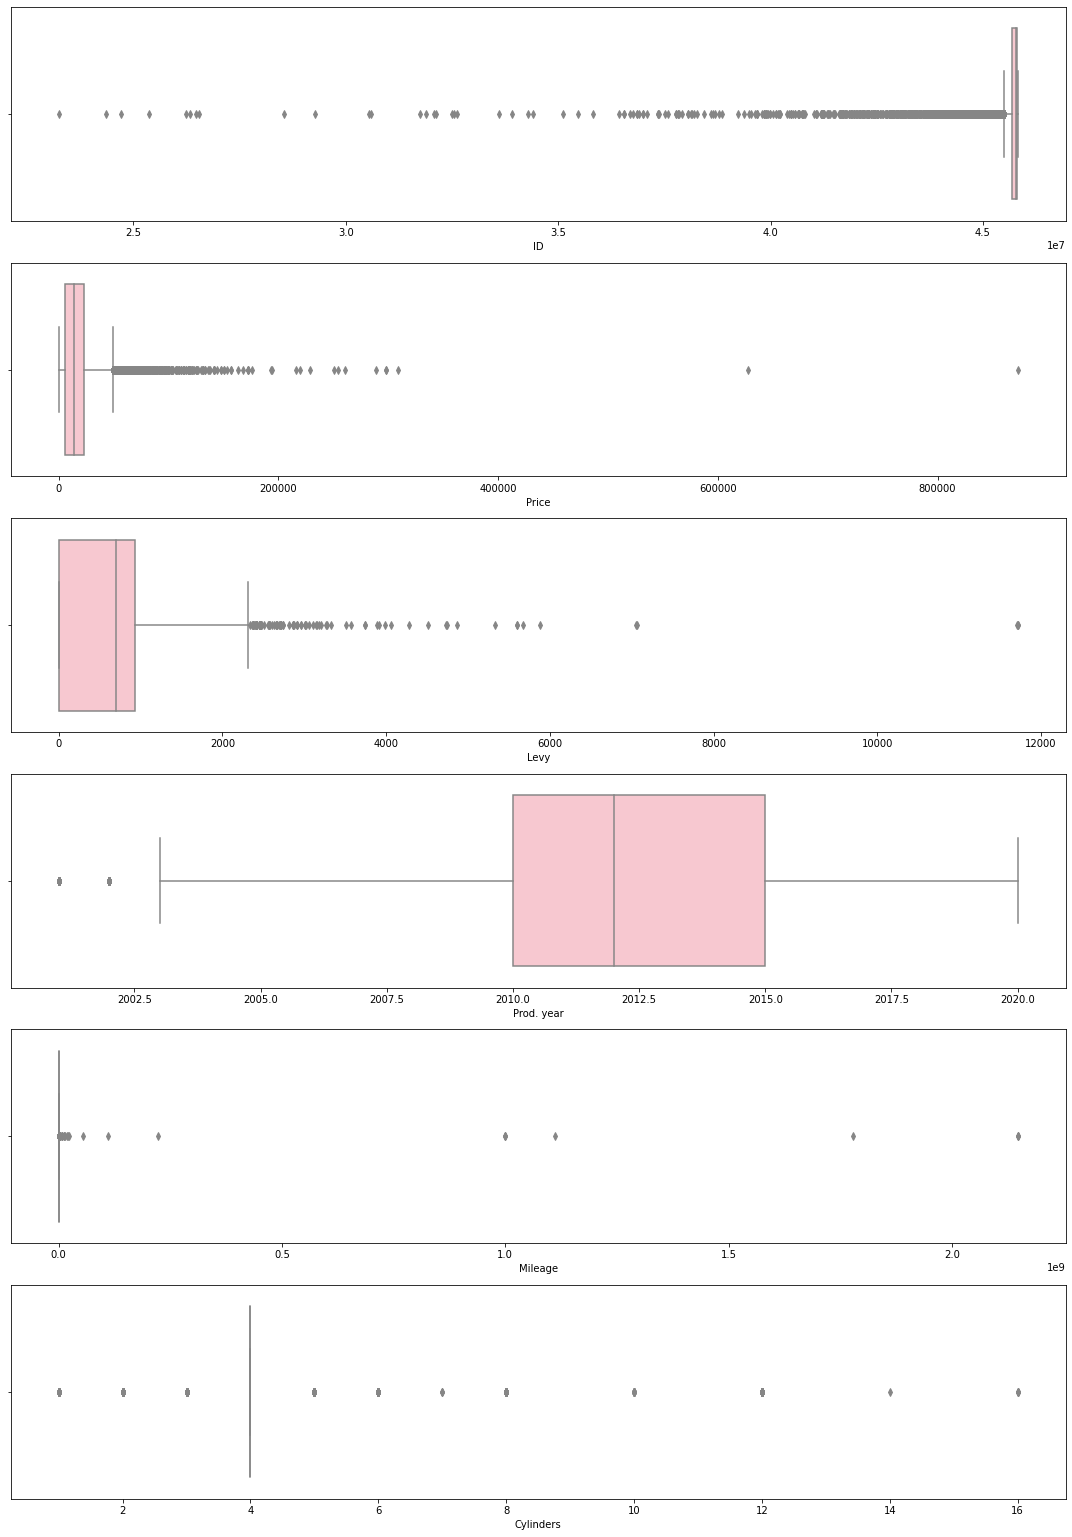

In [32]:
fig, axes = plt.subplots(7, 1, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_limpio, ax=axes[indice], color = "pink"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

Hemos decidido hacer nuevamente un filtrado por el precio para eliminar los dos registros que tenían el valor muy alto dentro de la columna price, ed decir, vamos a hacer un filtrado por el precio que sea menos a 400000.

In [33]:
df_limpio = df_limpio[df_limpio['Price'] <= 400000]
df_limpio

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,04,Grey,12
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,04,Black,4


Volvemos a chequear los outliers.

In [34]:
numericas = df_limpio.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
0,45654403,13328,1399,2010,186005,6.0,12
1,44731507,16621,1018,2011,192000,6.0,8


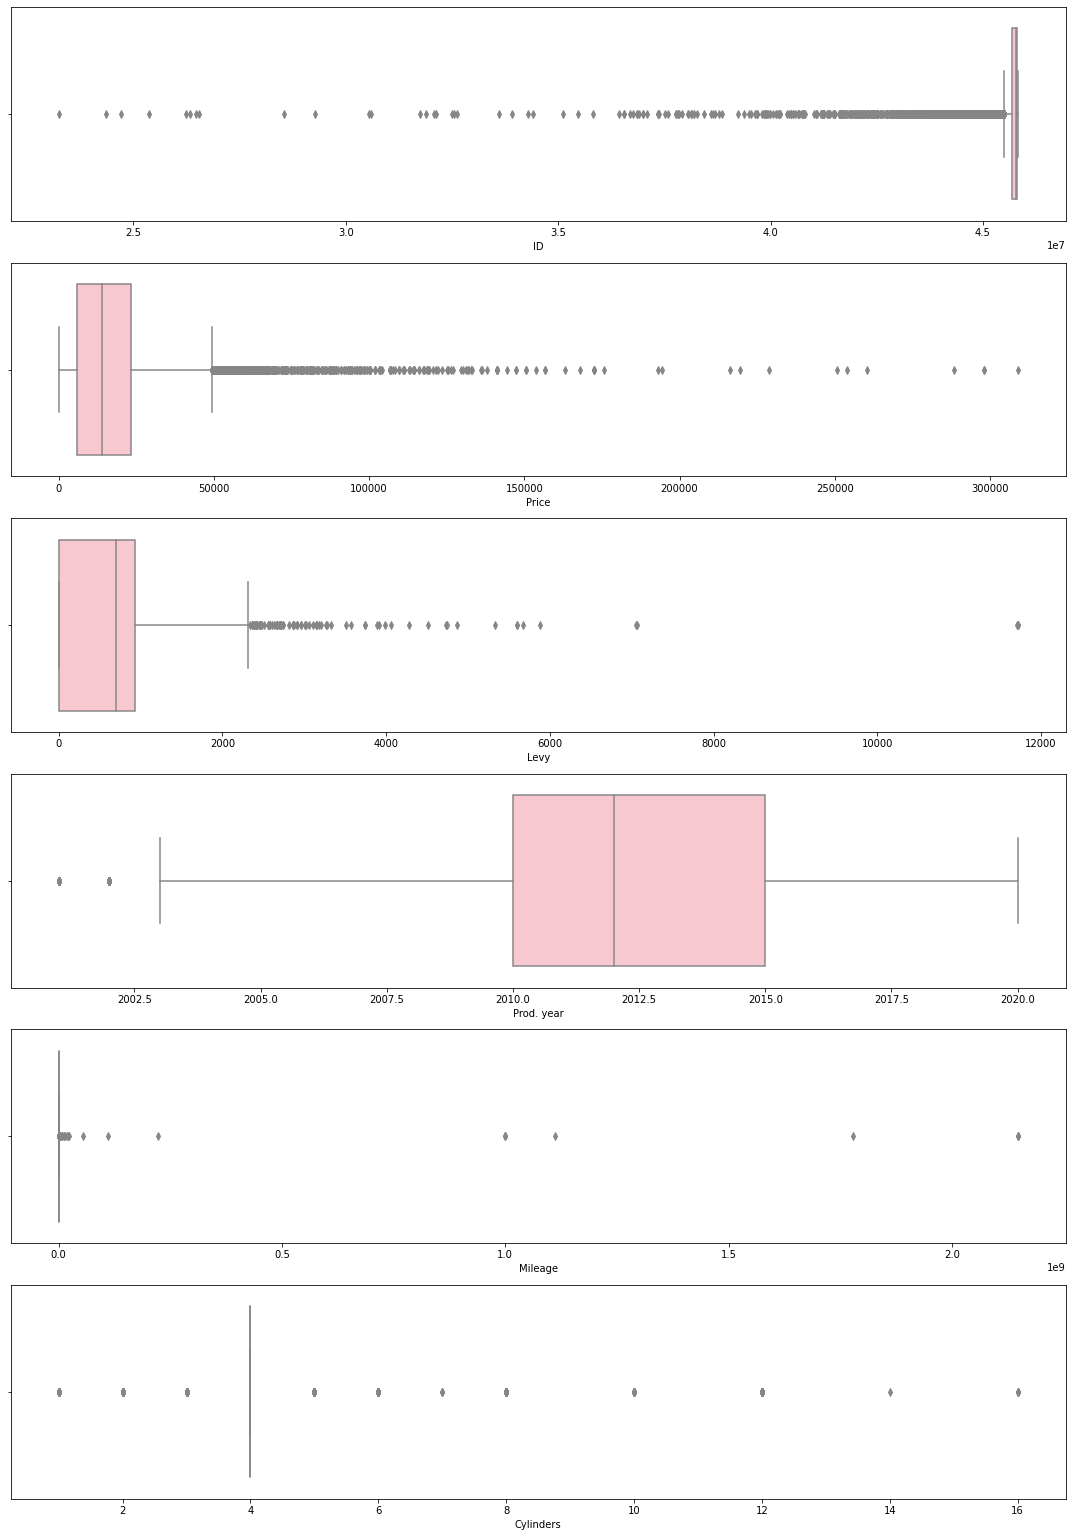

In [35]:
fig, axes = plt.subplots(7, 1, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_limpio, ax=axes[indice], color = "pink"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

#### <font color=violet> EDA variable dependiente

Hemos decidido predecir el precio de los carros en función de una serie de características. 

Por lo tanto, nuestra variable respuesta será `price` y el resto las predictoras.

- Vemos los principales estadísticos de nuestra variable `Price`

In [36]:
df_limpio['Price'].describe()

count     17683.000000
mean      17813.865012
std       18629.562442
min           1.000000
25%        5802.000000
50%       14113.000000
75%       23205.500000
max      308906.000000
Name: Price, dtype: float64

- Sacamos las características de los coches con el precio más bajo.

In [37]:
df_limpio[df_limpio['Price'] == df_limpio['Price'].min()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
16992,45772201,1,1202,CHEVROLET,Lacetti,2006,Hatchback,No,Petrol,1.6,200000,4.0,Manual,Front,04,Black,2


- Sacamos las características de los coches con el precio menor a 500.

In [38]:
df_menor_500 = df_limpio[df_limpio['Price'] < 500]
df_menor_500

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
27,45804684,30,0,TOYOTA,Prius,2008,Sedan,No,Hybrid,1.5,169000,4.0,Automatic,Front,04,White,8
33,45770026,125,1750,TOYOTA,Highlander,2008,Sedan,Yes,Hybrid,3.3,287274,6.0,Automatic,4x4,04,White,12
39,45661296,314,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,382746,6.0,Automatic,4x4,04,Silver,12
45,45769564,220,1194,TOYOTA,Tacoma,2013,Jeep,Yes,Petrol,4,239342,6.0,Automatic,4x4,04,Silver,12
53,45769316,392,1017,MERCEDES-BENZ,E 300,2017,Sedan,Yes,Petrol,2,1600,4.0,Automatic,Rear,04,Black,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,45763841,470,831,HYUNDAI,Elantra,2017,Sedan,Yes,Petrol,1.6,25635,4.0,Automatic,Front,04,Black,12
19218,45748699,30,0,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0,4.0,Automatic,Front,04,Green,9
19229,39977395,50,0,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000,4.0,Automatic,Front,04,Silver,6
19230,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,04,Silver,12


Observamos que hay un coche con precio 1 del año 2006 que no puede ser posible, y coches con precio menor a 500, que no consideramos representativos para hacer nuestro modelo de predicción. Por lo tanto vamos a prescindir de estos registros. Haremos un filtrado general para quedarnos con los coches que tienen precio de 500 en adelante.

In [39]:
df_limpio = df_limpio[df_limpio['Price'] >= 500]
df_limpio

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19228,45773726,706,1850,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874,6.0,Automatic,Rear,04,Black,12
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,04,Grey,12
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04,Grey,4


In [40]:
df_limpio[df_limpio['Price'] == df_limpio['Price'].min()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
13706,45788962,500,0,NISSAN,Tiida,2007,Hatchback,Yes,Petrol,1.8,0,4.0,Variator,Front,04,Grey,6


- Sacamos las características de los coches con el precio más alto.

In [41]:
df_limpio[df_limpio['Price']== df_limpio['Price'].max()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
5008,45810285,308906,1694,PORSCHE,911,2016,Coupe,Yes,Petrol,4,8690,6.0,Automatic,Rear,02,Black,12


In [42]:
df_limpio.dtypes

ID                     int64
Price                  int64
Levy                   int64
Manufacturer          object
Model                 object
Prod. year             int64
Category              object
Leather interior      object
Fuel type             object
Engine volume         object
Mileage                int64
Cylinders            float64
Gear box type         object
Drive wheels          object
Doors               category
Color                 object
Airbags                int64
dtype: object

#### <font color=violet> EDA variables independientes

Guardamos el archivo en formato pickle para que nos conserve el tipo de datos de las columnas que hemos cambiado.

In [43]:
df_limpio.to_pickle('datos/cars_price1.pkl')

In [44]:
df_limpio.to_csv('datos/cars_price1.csv')